Greatest deviation from orthonormality:
1.8416773688719212e-13


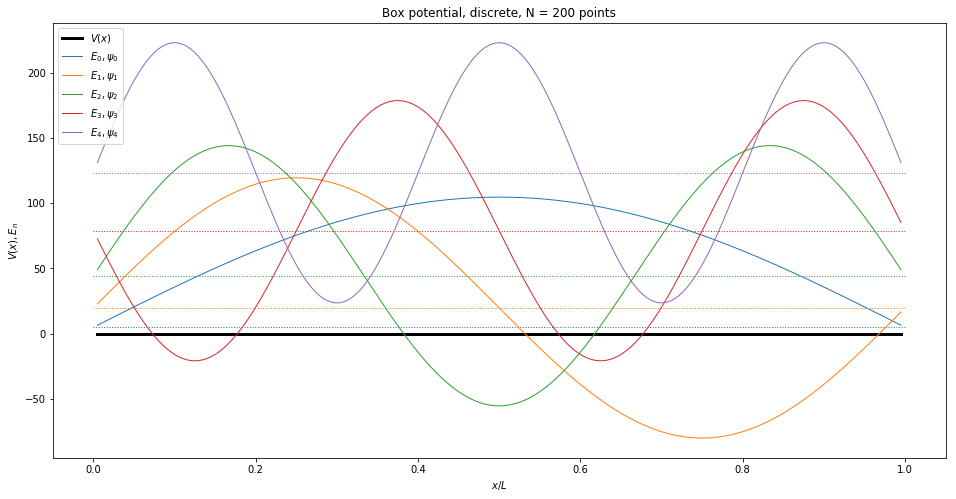

Greatest deviation from orthonormality:
3.504092926800519e-13


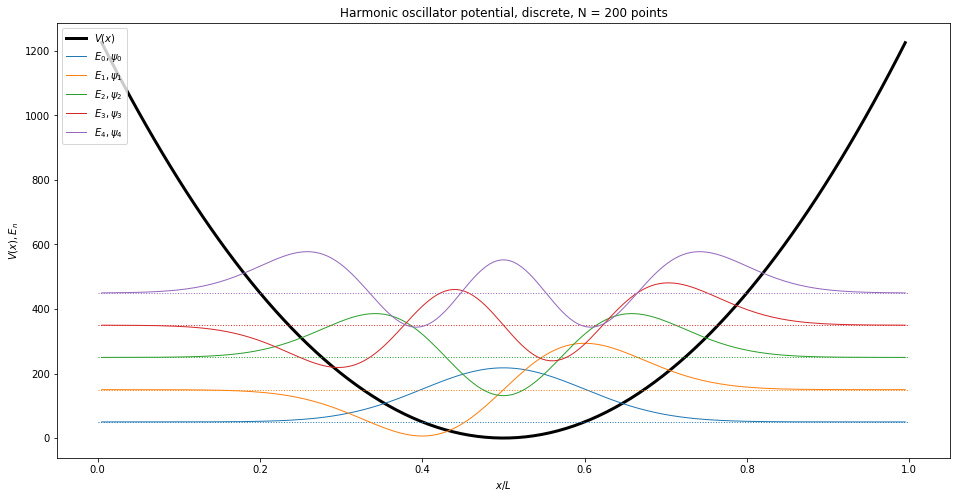

Greatest deviation from orthonormality:
5.51070385189688e-13


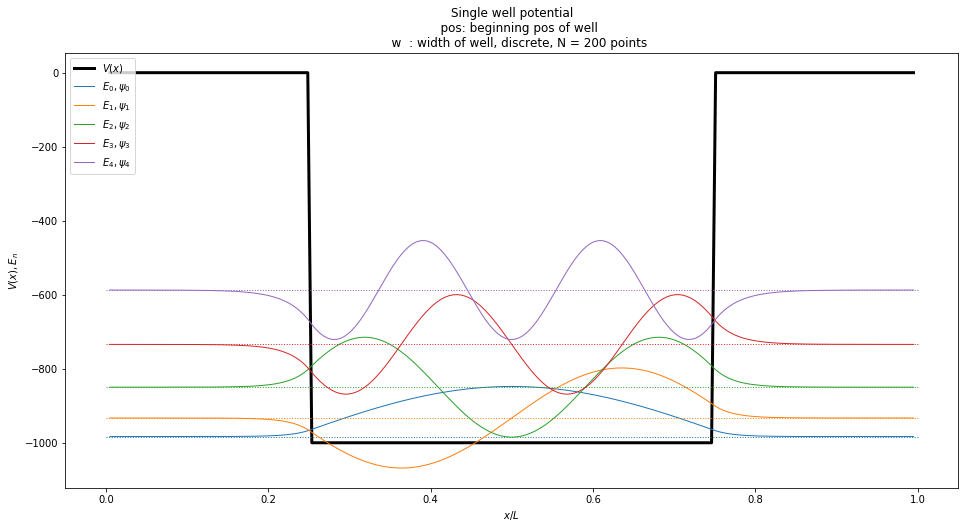

Greatest deviation from orthonormality:
1.8915022088653273e-13


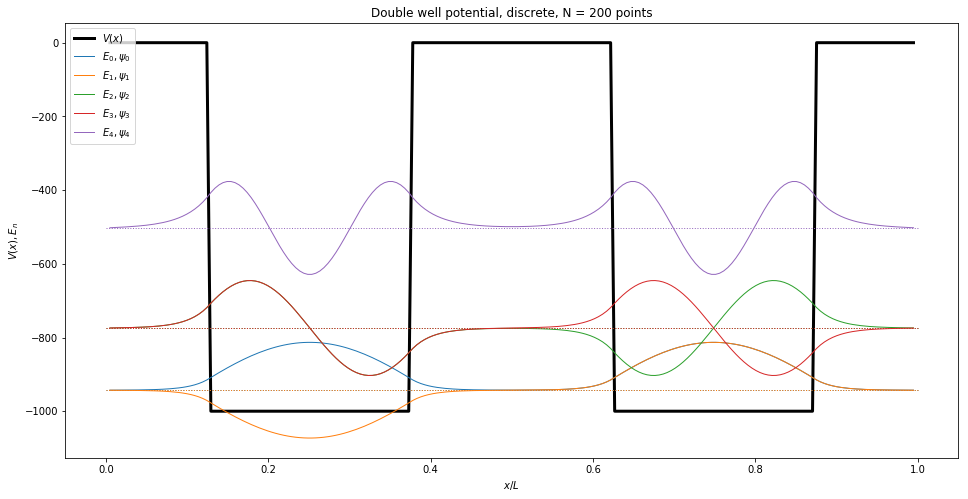

Greatest deviation from orthonormality:
1.5437408332161135e-13


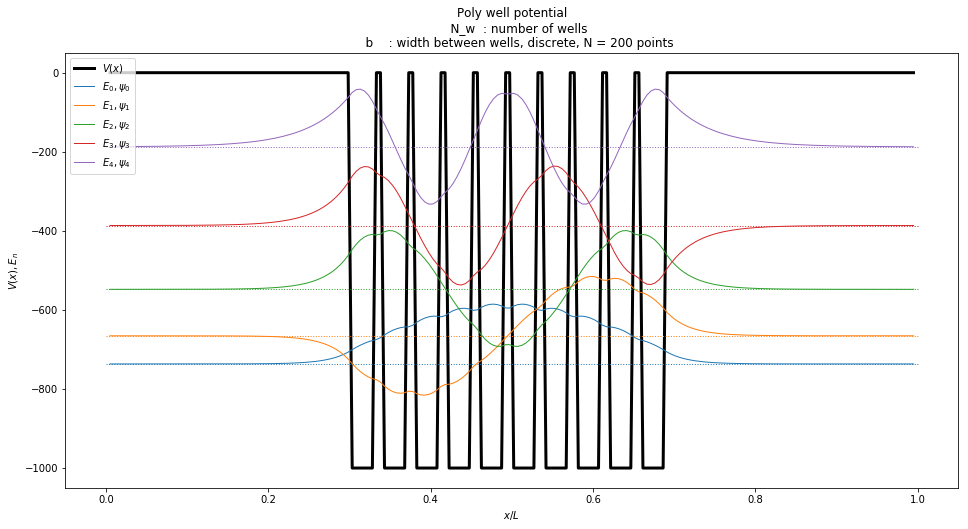

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

hbar = 1
m = 1

# Some does not have scipy.linalg.eigh_tridiagonal, so this takes care of that
# TODO: leave only one in the end
try:
    from scipy.linalg import eigh_tridiagonal
    get_eigh = lambda H: eigh_tridiagonal(np.diag(H), np.diag(H, k=1))
except ImportError:
    get_eigh = np.linalg.eigh

def V_box(x):
    """Box potential"""
    return 0

def V_harmosc(x): 
    """Harmonic oscillator potential"""
    return 10000 * 1/2 * (x - 1/2)**2

def V_atom(x, pos=0.25, w=0.5):
    """Single well potential
    pos: beginning pos of well
    w  : width of well"""
    if x > pos and x < pos + w:
        return -1000
    else:
        return 0

def V_molecule(x):
    """Double well potential"""
    if x < 0.5:
        return V_atom(x, pos=0.125, w=0.25)
    else:
        return V_atom(x, pos = 0.625, w=0.25) 


def V_crystal(x, N_w = 5, b=0.1):
    """Poly well potential
    N_w  : number of wells
    b    : width between wells"""
    w = (1.0 - N_w * b)/(N_w + 20.0) # Add 20 because we want to have 10w space on either side
    if x < 10*w or 1 - x < 10*w:
        return 0
    pos = (x - 10*w) % (w + b)
    return V_atom(pos, pos=0, w=w)
    
def investigate_potential(V, N, states, **kwargs):
    dx = 1 / (N + 1)
    x = np.linspace(dx, N * dx, N)
    v = [V(x[i], **kwargs) for i in range(0, N)]

    H = np.zeros((N, N))
    for i in range(0, N):
        H[i][i] = hbar**2 / (m * dx**2) + v[i]
    for i in range(0, N - 1):
        H[i][i+1] = -hbar**2 / (2 * m * dx**2)
        H[i+1][i] = -hbar**2 / (2 * m * dx**2)
    
    eigvals, eigvecs = get_eigh(H)
    energies = eigvals
    waves = eigvecs.T

    prod = eigvecs.T @ eigvecs
    print("Greatest deviation from orthonormality:")
    print(np.max(np.abs(eigvecs.T @ eigvecs - np.eye(N))))

    plt.figure(figsize=(16, 8))
    plt.title(V.__doc__ + ", discrete, N = %d points" % N)
    plt.xlabel("$x / L$")
    plt.ylabel("$V(x), E_n$")
    plt.plot(x, v, "k-", linewidth=3, label="$V(x)$")
    for i in range(0, len(states)):
        n = states[i]
        energy = energies[n]
        wave = waves[n]
        plt.plot((0, 1), (energy, energy), "C%d:" % (i % 10), linewidth=1)
        plt.plot(x, energy + wave * 1000, "C%d-" % (i % 10), linewidth=1, label="$E_{%d}, \psi_{%d}$" % (n, n))
    plt.legend(loc="upper left")
    plt.show()
    
investigate_potential(V_box, 200, range(0, 5))
investigate_potential(V_harmosc, 200, range(0, 5))
investigate_potential(V_atom, 200, range(0, 5))
investigate_potential(V_molecule, 200, range(0, 5))
investigate_potential(V_crystal, 200, range(0,5), N_w=10, b=0.01)